# COSMIC SHEAR

This notebook computes the angular power spectrum of the weak lensing potential and the shear correlation functions with and without Limber approximation and/or geometric approximation of the matter power spectrum [2,4].

### EXACT SHEAR CORRELATION FUNCTIONS

* The weak lensing potential reads
\begin{equation}
C_{\ell}^{\phi \phi}(i,j) = \frac{8}{\pi} \left(\frac{3 \Omega _{m,0} H_0^2}{2 c^2}\right)^2 \int_{k_{IR}}^{k_{UV}} \frac{\textrm{d}k}{k^2} \int_0^{\chi_S} \frac{\textrm{d}\chi}{a(\chi)\chi} \int_0^{\chi_S} \frac{\textrm{d}\chi'}{a(\chi')\chi'} \, q^i(\chi) q^j(\chi')\, j_{\ell}(k\chi)j_{\ell}(k\chi') \, P(k, \chi, \chi')
\end{equation}
 

It uses 

   a) The parametric lensing efficiency [1]

\begin{equation}
q(x; \alpha, \beta) = Q(\alpha + 1, \beta x) - \frac{\beta x}{\alpha} Q(\alpha, \beta x)
\end{equation}

  where $Q(a, b)$ is the regularised upper incomplete gamma function.

   b) The one-loop unequal-time matter power spectrum in standard perturbation theory [2], $P(k, \chi, \chi')$.


Note that $P(k, \chi, \chi')\approx \sqrt{P(k, (\chi + \chi')/2)P(k, (\chi + \chi')/2)}$.

And by making the following change of variables
\begin{equation}
    \begin{split}
        \overline{\chi} & \equiv \frac{\chi + \chi'}{2}\\
        s & \equiv \frac{\Delta \chi}{2} = \frac{\chi' - \chi}{2}
    \end{split}
\end{equation}
the angular power spectrum for the lensing potential reads
\begin{equation}
    \boxed{
        C_{\ell}^{\phi \phi}(i,j) = \frac{8}{\pi} \left(\frac{3 \Omega _m H_0^2}{2 c^2}\right)^2 \int_{k_{IR}}^{k_{UV}} \frac{\textrm{d}k}{k^2} \int_0^{\chi_S} \textrm{d}\overline{\chi} \, P(k, \overline{\chi}) I_{\nu}^{i,j}(k, \overline{\chi}) 
        }
\end{equation}
with 
\begin{equation}
     I_{\nu}^{i,j}(k, \overline{\chi}) = 2 \int_{-\overline{\chi}}^{\overline{\chi}} \textrm{d}s \, \tilde{f}^i(\overline{\chi}-s)  \tilde{f}^j(\overline{\chi}+s) J_{\nu}(k(\overline{\chi}-s))J_{\nu}(k(\overline{\chi}+s))  
\end{equation}
where $\nu \equiv \ell + 1/2$, $J_{\nu}(x)$ are the Bessel functions of first kind, and the filters

\begin{equation}
   \tilde{f}^m(x) = \frac{q^m(x)}{a(x)\sqrt{x^3}}
\end{equation}


* Secondly, the correlation between E-modes reads
    
\begin{equation}
    C_{\ell}^{\epsilon \epsilon}(i, j) =  \frac{1}{4} \frac{(\ell + 2)!}{(\ell - 2)!} C_{\ell}^{\phi \phi}(i,j)
\end{equation}

* Finally, the shear correlation functions

{\txtcolor{red}{Write here!}}


References
--------------
.. [1] https://arxiv.org/abs/2003.11558

.. [2] de la Bella (2020) in preparation

.. [3] https://ned.ipac.caltech.edu/level5/Hogg/Hogg4.html

.. [4] https://arxiv.org/abs/1704.01054

Data
-----
Cosmology:$ H_0 = 67.11, \Omega_b = 0.049, \Omega_{cdm} = 0.2685, \Omega_{\Lambda} = 0.6825 $

Parametrisation:

<img src="img/parameters.png" alt="parameters" width="500"/>
where  $ \alpha = \frac{1}{\mu \eta -1 }, \quad \beta = \frac{\eta}{\mu \eta - 1 }$. Note on units: $\alpha$ and $\beta $ should be in Mpc, so $\mu$ and $\eta$ should be converted.

In [1]:
import numpy as np
from scipy.interpolate import interp1d

In [2]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.11, Ob0=0.049, Om0= 0.2685)
h = cosmo.H0.value / 100

## WEAK LENSING ANGULAR POWER SPECTRUM
### 1. PARAMETRIC LENSING EFFICIENCY FUNCTION

In [3]:
import scipy.special as sc

In [4]:
mu = np.array([0.929, 1.278, 1.860, 2.473]) * 1000 / 0.7
eta = np.array([1.235, 0.832, 0.551, 0.412]) * 0.7 / 1000

alpha = 1.0 / (mu * eta - 1.0)
beta = eta / (mu * eta -1.0)

In [5]:
def q(x, ibin):
    a = alpha[ibin - 1]
    b = beta[ibin - 1]
    
    t1 = sc.gammaincc(a + 1, b * x) 
    t2 = b * x * sc.gammaincc(a, b * x) / a
    
    return t1 - t2

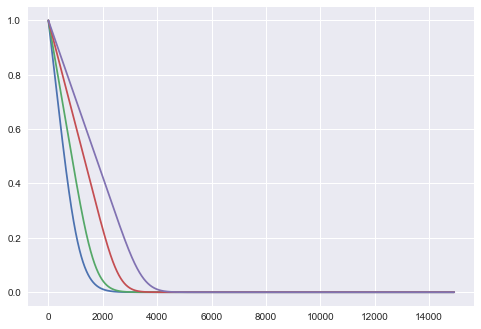

In [21]:
z_list = np.linspace(0, 1100,num=1000000)
xl = cosmo.comoving_distance(z_list).value
plt.plot(xl, q(x,1))
plt.plot(xl, q(x,2))
plt.plot(xl, q(x,3))
plt.plot(xl, q(x,4))

In [27]:
cosmo.comoving_distance(1100).value

14923.145371044207

### 2. ONE-LOOP MATTER POWER SPECTRUM (SPT)

* Usual equal-time matter power spectrum (linear and one-loop contributions)
\begin{equation}
    P(k,z) = D(z)^2 P_{11}(k) + D(z)^4 P_{22}(k) +  D(z)^4 P_{13}(k)
\end{equation}

  where $D(z)$ is the linear growth function.

In [6]:
k11, p11 = np.loadtxt("/Users/c49734lf/Workspace/2019-2020/Ongoing projects/Unequal-time EFT/UETC_SPT_notebooks/EDS/p11.text", unpack=True)
k22, p22 = np.loadtxt("/Users/c49734lf/Workspace/2019-2020/Ongoing projects/Unequal-time EFT/UETC_SPT_notebooks/EDS/p22.dat", unpack=True)
k13, p13 = np.loadtxt("/Users/c49734lf/Workspace/2019-2020/Ongoing projects/Unequal-time EFT/UETC_SPT_notebooks/EDS/p13.dat", unpack=True)

p11_int = interp1d( k11, p11, fill_value="extrapolate")
p22_int = interp1d( k22, p22, fill_value="extrapolate")
p13_int = interp1d( k13, p13, fill_value="extrapolate")

In [7]:
from skypy import power_spectrum as ps
g0 = ps.growth_function(0,cosmo)

def D(redshift, cosmology):
    return ps.growth_function(redshift, cosmology) / g0

def D2(redshift, cosmology):
    return np.power(ps.growth_function(redshift, cosmology) / g0, 2)

def P11(wavenumber, redshift, cosmology):
    return D2(redshift, cosmology) * p11_int(wavenumber)

def Pspt(wavenumber, redshift, cosmology):
    P22 = D2(redshift, cosmology)**2.0 * p22_int(wavenumber)
    P13 = D2(redshift, cosmology)**2.0 * p13_int(wavenumber)
    return P11(wavenumber, redshift, cosmology) + P22 + P13

* EFT matter power spectrum

### 3. $C_{\ell}$ COMPUTATION 

In [8]:
from scipy.integrate import simps,dblquad, quad, nquad
import pycuba

In [9]:
from astropy import units
from astropy import constants as const
c = const.c.to('km/s')
H0= cosmo.H(0)
H0_c = (H0/c).to('1/Mpc').value

The biyection between $\chi$ and redshift (or scale factor) is necesary:

In [10]:
z_list = np.linspace(0, 1100,num=1000000)
chi_list = cosmo.comoving_distance(z_list).value
z_of_chi = interp1d( chi_list, z_list, fill_value="extrapolate")

In [20]:
z_of_chi(4000)[()], Pspt(0.1,1.19518519, cosmo), chi_list[0]

(1.195185192261625, 1749.2735426193965, 0.0)

In [11]:
def f_tilde_om(x, ibin, cosmology=cosmo):
    if isinstance(x, np.ndarray):
        f = np.empty(len(x))
        for i in range(len(x)):
            if x[i] <=0:
                f[i] = 0
            elif x[i] > 0:
                omz = cosmology.Om(z_of_chi(x[i]))
                Hz = cosmology.H(z_of_chi(x[i])).value
                one_plus_z2 = np.power( 1.0 + z_of_chi(x[i]), 2)
                f[i] = q(x[i], ibin) * (1.5 * Hz * Hz * omz) / ( one_plus_z2 * np.power(x[i], 1.5) )   
    else:
        if x <=0:
            f = 0
        elif x > 0:
            omz = cosmology.Om(z_of_chi(x))
            Hz = cosmology.H(z_of_chi(x)).value
            one_plus_z2 = np.power( 1.0 + z_of_chi(x), 2)
            f = q(x, ibin) * (1.5 * Hz * Hz * omz) / ( one_plus_z2 * np.power(x, 1.5) )
    return  f / np.power(c.value,2)

def f_om(x, ibin, cosmology=cosmo):
    omz = cosmology.Om(z_of_chi(x))
    Hz = cosmology.H(z_of_chi(x)).value
    one_plus_z2 = np.power( 1.0 + z_of_chi(x), 2)
    
    if isinstance(x, np.ndarray):
        f = np.empty(len(x))
        for i in range(len(x)):
            
            f[i] = q(x[i], ibin) * (1.5 * Hz[i] * Hz[i] * omz[i]) / ( one_plus_z2[i] * x[i] )   
    else:
        f = q(x, ibin) * (1.5 * Hz * Hz * omz) / ( one_plus_z2 * x )
    return  f / np.power(c.value,2)

/Users/c49734lf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
/Users/c49734lf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
/Users/c49734lf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars
/Users/c49734lf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


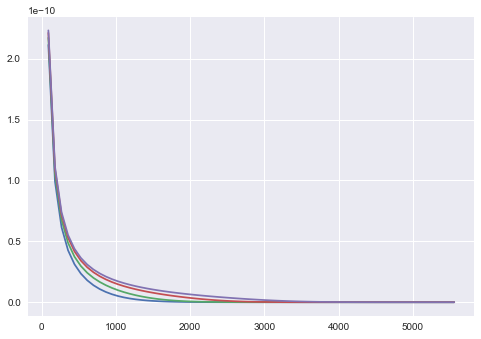

In [56]:
zl = np.linspace(0, 2,num=100)
chil = cosmo.comoving_distance(zl).value
plt.plot(chil, f_om(chil,1))
plt.plot(chil, f_om(chil,2))
plt.plot(chil, f_om(chil,3))
plt.plot(chil, f_om(chil,4))

Note that the argument of the filter needs to be a positive number. For mean values of comoving distance greater than 250 Mpc, and a distance in redshift of 0.1, this premise is safe.

Now the I integral
\begin{equation}
     I_{\nu}^{i,j}(k, \overline{\chi}) = 2 \int_{-\overline{\chi}}^{\overline{\chi}} \textrm{d}s \, \tilde{f}^i(\overline{\chi}-s)  \tilde{f}^j(\overline{\chi}+s) J_{\nu}(k(\overline{\chi}-s))J_{\nu}(k(\overline{\chi}+s))  
\end{equation}
where $\nu \equiv \ell + 1/2$, $J_{\nu}(x)$ are the Bessel functions of first kind.



In [12]:
from mpmath import quadosc

In [13]:
def Iij(k, chi_mean, ell, ibin, jbin, cosmology=cosmo, spherical=False, prefactor=False):
        
    nu = ell + 0.5
        
    def integrand(s):
    
        x_plus = chi_mean + s
        x_minus = chi_mean - s
        
        
            
        if spherical:
            jn_plus = sc.spherical_jn(ell, k * x_plus)
            jn_minus = sc.spherical_jn(ell, k * x_minus)
            if prefactor:
                fi = f(x_minus, ibin)
                fj = f(x_plus, jbin)
            else:
                fi = f_om(x_minus, ibin)
                fj = f_om(x_plus, jbin)
            
        else:
            jn_plus = sc.jn(nu, k * x_plus)
            jn_minus = sc.jn(nu, k * x_minus)
            if prefactor:
                fi = f_tilde(x_minus, ibin)
                fj = f_tilde(x_plus, jbin)
            else:
                fi = f_tilde_om(x_minus, ibin)
                fj = f_tilde_om(x_plus, jbin)
        
        return fi * fj * jn_minus * jn_plus 
    
    
    integral = quad(integrand, -chi_mean, chi_mean)
#         integral = quad(integrand, -np.inf, np.inf)
    
    
               
    return  2 * integral[0] 

In [21]:
%%time
Iij(1,4000,10, 1,1, spherical=True)

CPU times: user 29.4 ms, sys: 5.99 ms, total: 35.4 ms
Wall time: 30.3 ms


1.207906814321933e-16

In [31]:
%%time
Iij(1,4000,10, 1,1)

CPU times: user 634 ms, sys: 3.81 ms, total: 638 ms
Wall time: 638 ms


/Users/c49734lf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: IntegrationWarning: The integral is probably divergent, or slowly convergent.


4.4943772784947056e-08

The angular power spectrum for the lensing potential reads
\begin{equation}
    \boxed{
        C_{\ell}^{\phi \phi}(i,j) = \frac{8}{\pi} \left(\frac{3 \Omega _m H_0^2}{2 c^2}\right)^2 \int_{k_{IR}}^{k_{UV}} \frac{\textrm{d}k}{k^2} \int_0^{\chi_S} \textrm{d}\overline{\chi} \, P(k, \overline{\chi}) I_{\nu}^{i,j}(k, \overline{\chi}) 
        }
\end{equation}
Note: $\Omega_m^2$ might be the redshift dependent quantity, therefore we would need to use $\Omega_m(z_i)\Omega_m(z_j)$. 

In [14]:
def P_integral(k, chi_mean, ell, ibin, jbin, cosmology=cosmo, spherical=False, prefactor=False):
    
    chi_s = cosmology.comoving_distance(1100).value
    
    nu = ell + 0.5
        
    def integrand(chi_mean, s):
        x_plus = chi_mean + s
        x_minus = chi_mean - s
            
        if spherical:
            jn_plus = sc.spherical_jn(ell, k * x_plus)
            jn_minus = sc.spherical_jn(ell, k * x_minus)
            if prefactor:
                fi = f(x_minus, ibin)
                fj = f(x_plus, jbin)
            else:
                fi = f_om(x_minus, ibin)
                fj = f_om(x_plus, jbin)
        else:
            jn_plus = sc.jn(nu, k * x_plus)
            jn_minus = sc.jn(nu, k * x_minus)
            if prefactor:
                fi = f_tilde(x_minus, ibin)
                fj = f_tilde(x_plus, jbin)
            else:
                fi = f_tilde_om(x_minus, ibin)
                fj = f_tilde_om(x_plus, jbin)
        
        Iij_integrand = fi * fj * jn_minus * jn_plus
        Pk_integrand = Pspt(k, z_of_chi(chi_mean)[()], cosmology)
        
        return  Pk_integrand * Iij_integrand

#     integral = nquad(integrand, [[0.001, chi_s],[-chi_mean, chi_mean]])
    
    integral = nquad(integrand, [[0.001, chi_s],[-chi_mean, chi_mean]])
    return  integral[0]

In [35]:
%%time
P_integral(0.1,0, 100, 1, 1 )

CPU times: user 2min 6s, sys: 379 ms, total: 2min 6s
Wall time: 2min 6s


0.0

In [16]:
def cl(ell, ibin, jbin, k_min=0.01, k_max=0.2, cosmology=cosmo, spherical=False, prefactor=False):
                
    chi_s = cosmology.comoving_distance(1100).value
    
    nu = ell + 0.5
        
    def integrand(k, chi_mean, s):
        x_plus = chi_mean + s
        x_minus = chi_mean - s
            
        if spherical:
            jn_plus = sc.spherical_jn(ell, k * x_plus)
            jn_minus = sc.spherical_jn(ell, k * x_minus)
            if prefactor:
                fi = f(x_minus, ibin)
                fj = f(x_plus, jbin)
            else:
                fi = f_om(x_minus, ibin)
                fj = f_om(x_plus, jbin)
        else:
            jn_plus = sc.jn(nu, k * x_plus)
            jn_minus = sc.jn(nu, k * x_minus)
            if prefactor:
                fi = f_tilde(x_minus, ibin)
                fj = f_tilde(x_plus, jbin)
            else:
                fi = f_tilde_om(x_minus, ibin)
                fj = f_tilde_om(x_plus, jbin)
        
        Iij_integrand = fi * fj * jn_minus * jn_plus
        Pk_integrand = Pspt(k, z_of_chi(chi_mean)[()], cosmology)
        
        return  Pk_integrand * Iij_integrand / np.power(k,2)

    
    integral = nquad(integrand, [[k_min,k_max],[0, chi_s],[-chi_mean, chi_mean]]) 
    
    if prefactor:
        factor = (8 / np.pi) * np.power(1.5 * cosmology.Om0 * H0_c * H0_c, 2.0) 
    else:
        factor = (8 / np.pi) 
    
    return factor * integral[0]  

In [23]:
%%time
cl(np.array([100]),3,3)

NameError: name 'chi_mean' is not defined

In [15]:
from scipy.special import gamma

In [16]:
def cl_exact(ell, ibin, jbin, k_min=0.01, k_max=0.2, cosmology=cosmo):
    # ell must be natural
    chi_s = cosmology.comoving_distance(1100).value
    
    nu = ell + 0.5
        
    def integrand(x, s, chi_mean):
        x_plus = chi_mean + s
        x_minus = chi_mean - s
            
        
        fi = f_tilde_om(x_minus, ibin)
        fj = f_tilde_om(x_plus, jbin)
        
        
        fx = fi * fj *  Pspt(x, z_of_chi(chi_mean)[()], cosmology) / np.power(x, 3.0 - nu)
        
        return np.power(x, 1.0 - nu) * fx

    def lims(chi_mean):
        return [-chi_mean, chi_mean]
    integral = nquad(integrand, [[0, np.inf],lims,[0, chi_s]]) 
    
    Pll = np.power(2, ell) * gamma(2*ell) * gamma(nu) * np.power( 1.0 - np.cos(nu)**2, 0.5 * ell) / np.sqrt(np.pi)
    factor = (8 / np.pi) * Pll  * np.power(np.sin(nu),ell) / np.sqrt(2 * np.pi)
    
    return factor * integral[0]  

In [115]:
%%time
cl_exact(100,3,3)

KeyboardInterrupt: 

https://cubajl.readthedocs.io/en/v0.2.0/

In [17]:
def cl_cuba_exact(ell, ibin, jbin, cosmology=cosmo):
             
    l_len = len(ell)
    # ell must be natural
    chi_s = cosmology.comoving_distance(1100).value
    
    nu = ell + 0.5
    
    #limits and jacobian
    bx = np.inf
    ax = 0
    def jacx(y):
        return 1 / np.power(1 - y, 2)
    
    bchi =  chi_s
    achi = 0
    jacchi = bchi - achi
    
    def ass(chiscaled):
        return -chiscaled
    def bss(chiscaled):
        return chiscaled
    
    def jacs(chiscaled):
#         chiscaled = achi + (bchi - achi)* chi_mean
        return bss(chiscaled) - ass(chiscaled)
         
    

    
    def intf(x, s, chi_mean, ell):
        nu = ell + 0.5
        
        x_plus = chi_mean + s
        x_minus = chi_mean - s
            
        
        fi = f_tilde_om(x_minus, ibin)
        fj = f_tilde_om(x_plus, jbin)
        
        
        fx = fi * fj *  Pspt(x, z_of_chi(chi_mean)[()], cosmology) / np.power(x, 3.0 - nu)
        
        return np.power(x, 1.0 - nu) * fx
    
    res = np.zeros(l_len)
        
    for i in range(l_len):
        
        def integrand_scaled(ndim, xx, ncomp, ff, userdata):
            # access the current parameters
            y, s , chim = [xx[i] for i in range(ndim.contents.value)]
            # compute the result
            x_scaled = y / (1 - y)
            chi_scaled = achi + (bchi - achi) * chim
            s_scaled = ass(chi_scaled) + (bss(chi_scaled) - ass(chi_scaled)) * s
            
                
                
            integrand = intf(x_scaled, s_scaled, chi_scaled, ell[i])
            result = jacx(y) * jacs(chi_scaled) * jacchi * integrand
            # store the result (here only one component)
            ff[0] = result                    
            return 0
                    
        cuba = pycuba.Cuhre(integrand_scaled, 3)
        res[i] = cuba.get("results")[0].get("integral")
            
                    
    integral = res
    Pll = 1#* np.power(2, ell) * ( gamma(nu)/gamma(2*ell)) * np.power( 1.0 - np.cos(nu)**2, 0.5 * ell) / np.sqrt(np.pi)

    factor = (8 / np.pi) * Pll  * np.power(np.sin(nu),ell) / np.sqrt(2 * np.pi)
    
    return factor * integral 


In [217]:
%%time
cl_cuba_exact(np.array([10]),3,3)

CPU times: user 3min 59s, sys: 338 ms, total: 4min
Wall time: 4min


array([307499.61438805])

2.2085852387179792e-08

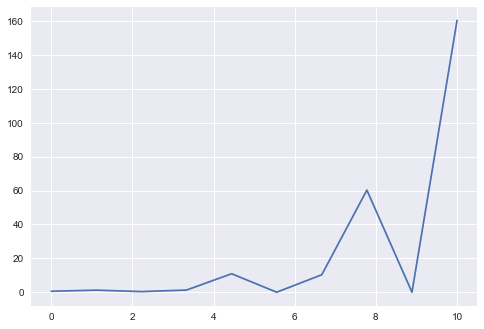

In [22]:
def mypll(ell):
    nu = 0.5 + ell 
    logv = ell + np.log2(np.sqrt( np.power( 1.0 - np.power(np.cos(nu), 2), ell) / np.pi))
    return  np.power(2, logv) 
#     return  (np.power(2, ell)* gamma(nu)/gamma(2*ell)) * np.power( 1.0 - np.cos(nu)**2, 0.5 * ell) / np.sqrt(np.pi)
mypll(10), gamma(10.5)/ gamma(20)
# cll = 307499.61438805*mypll(10)
lv = np.linspace(0,10,num=10)
plt.plot(lv, mypll(lv))
mypll(9)

In [218]:
from scipy.special import lpmn
(lpmn(-1,1,10)[0]), mypll(1)

(array([[ 1.        , 10.        ],
        [ 0.        ,  4.97493719]]),
 0.9974949866040544)

* Limber's approximation

In [45]:
def cl_limber(ell, ibin, jbin, k_min=0.01, k_max=0.2, cosmology=cosmo):
    
    nu = ell + 0.5
    
    def integrand(k, nus):
            filters = f_om(nus/k, ibin, cosmology) * f_om(nus/k, jbin, cosmology)
            power_k2 = Pspt(k, z_of_chi(nus/k)[()], cosmology) / (k * k)
            return filters * power_k2 
    
    if isinstance(ell, np.ndarray):
        integral = np.empty(len(ell))
        for i in range(len(ell)):
            integral[i] = quad(integrand, k_min, k_max, args=nu[i])[0]
    else:        
        integral = quad(integrand, k_min, k_max, args=nu)[0]
    
#     return (4 / nu) * integral
    return (8 / np.power(nu,3))*integral

In [101]:
def cl_limber2(ell, ibin, jbin, cosmology=cosmo):
    
    nu = ell + 0.5
#     chi_s = cosmology.comoving_distance(1100).value
    chi_s = np.inf
    def integrand(chi, nus):
            filters = f_om(chi, ibin, cosmology) * f_om(chi, jbin, cosmology)
            power_chi2 = Pspt(nus/chi, z_of_chi(chi)[()], cosmology) * (chi * chi)
            return filters * power_chi2 
    
    if isinstance(ell, np.ndarray):
        integral = np.empty(len(ell))
        for i in range(len(ell)):
            integral[i] = quad(integrand, 0, chi_s, args=nu[i])[0]
    else:        
        integral = quad(integrand, 0, chi_s, args=nu)[0]
    
    return  (8 / np.power(nu,3)) * integral

In [96]:
np.inf

inf

In [46]:
%%time
cl_limber(100,1,1) 

CPU times: user 119 ms, sys: 8.05 ms, total: 127 ms
Wall time: 124 ms


2.6874275896752515e-23

In [100]:
%%time
cl_limber2(100,1,1)
# cl_limber(np.array([0,1]),1,1)

CPU times: user 250 ms, sys: 3.51 ms, total: 254 ms
Wall time: 254 ms


-1.061358277659252e-15

### 4. $C_{\ell}^{\epsilon \epsilon}$ COMPUTATION
* Exact calculation
We can also comput the correlation between E-modes:
    
\begin{equation}
    C_{\ell}^{\epsilon \epsilon}(i, j) = \frac{1}{4} \frac{(\ell + 2)!}{(\ell - 2)!} C_{\ell}^{\phi \phi}(i,j)
\end{equation}

Note: This integral entails a complicated factor that can grow to infinity very fast
\begin{equation}
    \frac{(\ell + 2)!}{(\ell - 2)!} = (\ell + 2) * (\ell + 1) * (\ell) * (\ell - 1)
\end{equation}

In [23]:
def factorial_array(num):
    
    if isinstance(num, np.ndarray):
        nl = len(num)
        factorial = np.ones(nl)
    else:
        nl = 1
        factorial = 1
        
    for j in range(nl):
        
        for i in range(1, num[j] + 1):
            
            factorial[j] = factorial[j] * i
         
    return factorial    
def factorial_fraction(ell):
    return  (ell + 2) * (ell + 1) * (ell) * (ell - 1)

In [ ]:
def cl_EE(ell, ibin, jbin, cosmology=cosmo, k_min=0.001, k_max=1, geometric=None):
    factor = factorial_fraction(ell)

    return factor * cl(ell, ibin, jbin, cosmology, k_min, k_max, geometric) / 4

In [ ]:
%%time
cl_EE(np.array([100]), 1,1)

* Limber approximation

\begin{equation}
    \begin{split}
        C_{\ell}^{\epsilon \epsilon}(i, j) & = \frac{1}{(\ell + 1/2)^4} \frac{(\ell + 2)!}{(\ell - 2)!}
    \left(\frac{3 \Omega _m H_0^2}{2c^2}\right)^2 \int_0^{\chi_S} \textrm{d}\chi \, [1 + z(\chi)]^2 \, q^i(\chi) q^j(\chi) \, P((\ell + 1/2)/\chi; \chi)\\
    & = \frac{1}{(\ell + 1/2)^4} \frac{(\ell + 2)!}{(\ell - 2)!}
    \left(\frac{3 \Omega _m H_0^2}{2c^2}\right)^2 \int_0^{1100} \textrm{d}z \, \frac{c}{H_0}\frac{(1 + z)^2}{E(z)} \, q^i(\chi(z)) q^j(\chi(z)) \, P((\ell + 1/2)/\chi(z); z)
    \end{split}
\end{equation}

Note: This integral entails a complicated factor that can grow to infinity very fast
\begin{equation}
    \frac{(\ell + 2)!}{(\ell - 2)!} = (\ell + 2) * (\ell + 1) * (\ell) * (\ell - 1)
\end{equation}

In [24]:
from pynverse import inversefunc
from scipy.integrate import simps, quad, quadrature

In [75]:
def cl_EE_limber(ell, ibin, jbin, k_min=0.01, k_max=0.2, cosmology=cosmo):
          
    nu = ell + 0.5
    factor = (1.0 / np.power(nu,4)) * factorial_fraction(ell)
    
    
    return factor * cl_limber(ell, ibin, jbin, k_min, k_max, cosmology)
def cl_EE_limber2(ell, ibin, jbin, cosmology=cosmo):
          
    nu = ell + 0.5
    factor = (1.0 / np.power(nu,4)) * factorial_fraction(ell)
    
    
    return factor * cl_limber2(ell, ibin, jbin, cosmology)

In [77]:
%%time
cl_EE_limber(100, 1,1)

CPU times: user 119 ms, sys: 3.29 ms, total: 122 ms
Wall time: 120 ms


2.6867624161095675e-23

In [76]:
%%time
cl_EE_limber2(100, 1,1)

CPU times: user 252 ms, sys: 4.08 ms, total: 256 ms
Wall time: 254 ms


-1.0610955775691244e-15

* The shear correlation functions:
\begin{equation}
    \xi_{+}(\theta, i, j) = \frac{1}{2 \pi} \int \textrm{d}\ell \, \ell \, J_0(\ell \theta)C_{\ell}^{\epsilon \epsilon}(i, j)
\end{equation}
\begin{equation}
    \xi_{-}(\theta, i, j) = \frac{1}{2 \pi} \int \textrm{d}\ell \, \ell \, J_4(\ell \theta)C_{\ell}^{\epsilon \epsilon}(i, j)
\end{equation}

In [27]:
def xi_plus_limber(theta, ibin, jbin, ell_min=10, ell_max=100,  k_min=0.01, k_max=0.2, cosmology=cosmo):
    
    def integrand_limber(k, ell):
        nu = ell + 0.5
        
        factor = (1.0 / np.power(nu,4)) * factorial_fraction(ell)
        filters = f_om(nu/k, ibin, cosmology) * f_om(nu/k, jbin, cosmology)
        power = Pspt(k, z_of_chi(nu/k)[()], cosmology) / (k * k)
        
        return (4 / nu) * filters * power 

    
    def intf(ell, k, theta):
        c_EE = integrand_limber(k, ell)
        jl = sc.jv(0, ell * theta)
        return ell * jl * c_EE

    l_len = len(theta)
    #limits and jacobian
    bell = ell_max
    aell = ell_min
    jacell = bell - aell
    bk = k_max
    ak = k_min
    jack = bk - ak
    
        
    res = np.zeros(l_len)
        
    for i in range(l_len):
        
        def integrand_scaled(ndim, xx, ncomp, ff, userdata):
            # access the current parameters
            l , kk = [xx[i] for i in range(ndim.contents.value)]
            # compute the result
            l_scaled = aell + (bell - aell) * l
            k_scaled = ak + (bk - ak) * kk
                
                
            integrand = intf(l_scaled, k_scaled, theta[i])
            result = jacell * jack * integrand
            # store the result (here only one component)
            ff[0] = result                    
            return 0
                    
        cuba = pycuba.Cuhre(integrand_scaled,2)
        res[i] = cuba.get("results")[0].get("integral")
            
                    
    integral = res
    
    
    return integral / (2 * np.pi)

In [28]:
%%time
xi_plus_limber(np.array([100]),1,1)

CPU times: user 923 ms, sys: 4.62 ms, total: 928 ms
Wall time: 926 ms


array([-9.95677136e-17])

In [29]:
def xi_minus_limber(theta, ibin, jbin, ell_min=50, ell_max=100,  k_min=0.01, k_max=0.2, cosmology=cosmo):
    
    def integrand_limber(k, ell):
        nu = ell + 0.5
        
        factor = (1.0 / np.power(nu,4)) * factorial_fraction(ell)
        filters = f_om(nu/k, ibin, cosmology) * f_om(nu/k, jbin, cosmology)
        power = Pspt(k, z_of_chi(nu/k)[()], cosmology) / (k * k)
        
        return (4 / nu) * filters * power 

    
    def intf(ell, k, theta):
        c_EE = integrand_limber(k, ell)
        jl = sc.jv(4, ell * theta)
        return ell * jl  * c_EE

    l_len = len(theta)
    #limits and jacobian
    bell = ell_max
    aell = ell_min
    jacell = bell - aell
    bk = k_max
    ak = k_min
    jack = bk - ak
    
        
    res = np.zeros(l_len)
        
    for i in range(l_len):
        
        def integrand_scaled(ndim, xx, ncomp, ff, userdata):
            # access the current parameters
            l , kk = [xx[i] for i in range(ndim.contents.value)]
            # compute the result
            l_scaled = aell + (bell - aell) * l
            k_scaled = ak + (bk - ak) * kk
                
                
            integrand = intf(l_scaled, k_scaled, theta[i])
            result = jacell * jack * integrand
            # store the result (here only one component)
            ff[0] = result                    
            return 0
                    
        cuba = pycuba.Cuhre(integrand_scaled,2)
        res[i] = cuba.get("results")[0].get("integral")
            
                    
    integral = res
    
    
    return integral / (2 * np.pi)

In [30]:
%%time
xi_minus_limber(np.array([100]),1,1)

CPU times: user 894 ms, sys: 4.72 ms, total: 899 ms
Wall time: 896 ms


array([1.14455446e-19])

-------------------
## SANITY CHECKS

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

* Check that my one-loop matter power spectrum at redshift 0 matches precomputed values

In [29]:
k, linear = np.loadtxt("/Users/c49734lf/Workspace/2019-2020/Ongoing projects/Unequal-time EFT/modules/SPT_Quijote_fit/plin0_k2.txt", unpack=True)
k, spt = np.loadtxt("/Users/c49734lf/Workspace/2019-2020/Ongoing projects/Unequal-time EFT/modules/SPT_Quijote_fit/pspt0_k2.txt", unpack=True)

plinear = interp1d( k, linear, fill_value="extrapolate")
pspt = interp1d( k, spt, fill_value="extrapolate")

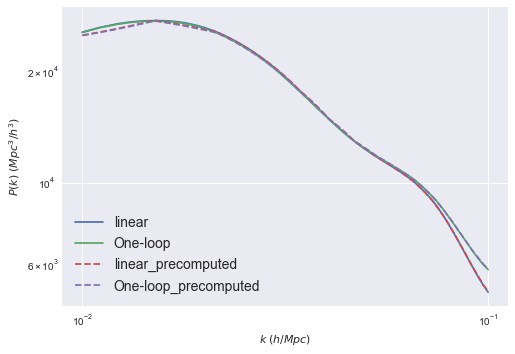

In [30]:
kvalues = np.logspace(-2,-1,num=1000)
plt.loglog(kvalues, P11(kvalues, 0, cosmo), '-', label='linear')
plt.loglog(kvalues, Pspt(kvalues, 0, cosmo), '-', label='One-loop')
plt.loglog(kvalues, plinear(kvalues), '--', label='linear_precomputed')
plt.loglog(kvalues, pspt(kvalues), '--', label='One-loop_precomputed')


plt.legend(fontsize=14)

plt.xlabel("$k$ $(h/Mpc)$")
plt.ylabel("$P(k)$ $(Mpc^3/h^3)$");


* The E-mode correlations should follow Figure 1 in Lemos et al. 2014 [4]
<img src="img/lemos.png" alt="lemos" width="500"/>

In [102]:
ellv = np.logspace(0, 2, num=100) 
ellv3 = np.logspace(0,2,num=3)
# cee = cl_EE(ellv, 1,1)
# ceeg = cl_EE(ellv, 1, 1, geometric=True)

In [67]:
cL = cl_limber(ellv, 1,1)

In [103]:
cL2 = cl_limber2(ellv,1,1)

In [106]:
cL2,cL;

In [26]:
cLexact = cl_cuba_exact(ellv3,1,1)

/Users/c49734lf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in power
/Users/c49734lf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in power
/Users/c49734lf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
/Users/c49734lf/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


In [28]:
ellv3, cLexact

(array([  1.,  10., 100.]),
 array([1103257.76422869,  306966.69488655,              nan]))

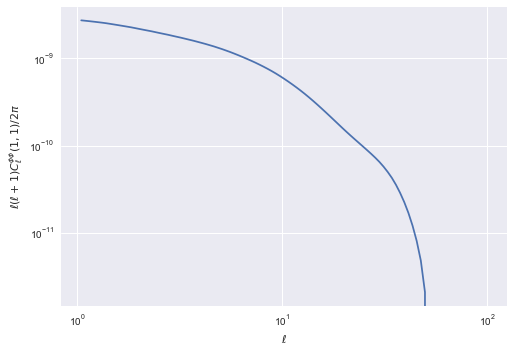

In [107]:
l = ellv[1:]
# plt.loglog(l, l * (l + 1) * 0.5 * cL[1:]/(np.pi ),'--')
plt.loglog(l, l * (l + 1) * 0.5 * cL2[1:]/(np.pi ))
plt.xlabel("$\ell$")
plt.ylabel("$\ell (\ell + 1)C_{\ell}^{\phi \phi}(1,1)/ 2\pi$");
# plt.savefig("/Users/c49734lf/Workspace/2019-2020/Presentations/Sarahs_meetings/June_5/Plots/c11(l(l+1))_limber.pdf")

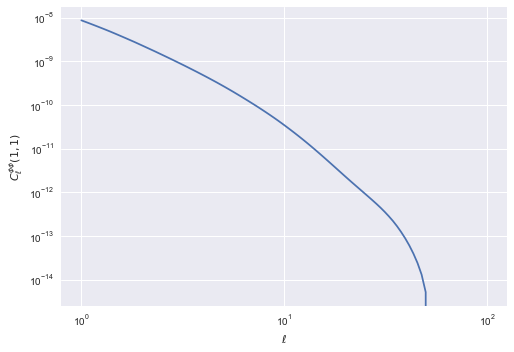

In [108]:
# plt.loglog(ellv,cL)
plt.loglog(ellv,cL2)
plt.xlabel("$\ell$")
plt.ylabel("$C_{\ell}^{\phi \phi}(1,1)$");
# plt.savefig("/Users/c49734lf/Workspace/2019-2020/Presentations/Sarahs_meetings/June_5/Plots/c11_limber.pdf")

In [109]:
# ceeL = cl_EE_limber(ellv, 1,1)
ceeL2 = cl_EE_limber2(ellv, 1,1)

In [91]:
ceeL2;

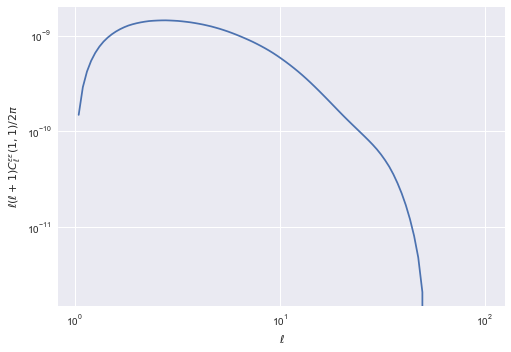

In [110]:
l = ellv[1:]
plt.loglog(l, l * (l + 1) * 0.5 * ceeL2[1:]/(np.pi ))
plt.xlabel("$\ell$")
plt.ylabel("$\ell (\ell + 1)C_{\ell}^{\epsilon \epsilon}(1,1)/ 2\pi$");

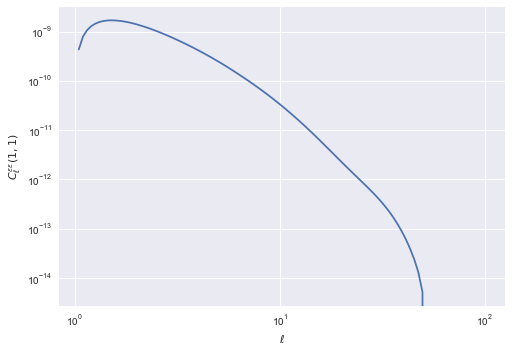

In [111]:
# plt.plot(ellv, cee)
# plt.plot(ellv, ceeg)
plt.loglog(ellv[1:],ceeL2[1:])
# plt.loglog(ellv[1:],ceeL[1:])
plt.xlabel("$\ell$")
plt.ylabel("$C_{\ell}^{\epsilon \epsilon}(1,1)$");
# plt.savefig("/Users/c49734lf/Workspace/2019-2020/Presentations/Sarahs_meetings/June_5/Plots/cEE_limber.pdf")

* The shear correlations should follow Figure 2 in Lemos et al. 2014 [4]
<img src="img/xip_xim.png" alt="xi" width="800"/>

In [42]:
thetav = np.logspace(1, 3, num=100) 
xipL = xi_plus_limber(thetav, 1,1)
ximL = xi_minus_limber(thetav, 1,1)

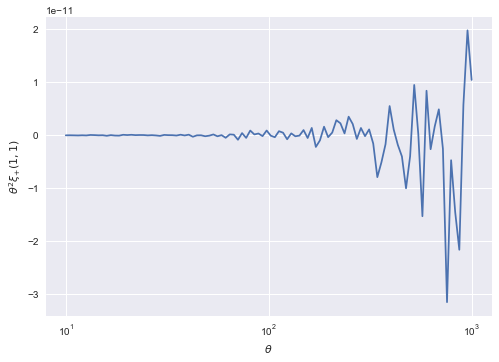

In [43]:
plt.xscale('log')
plt.plot(thetav, thetav**2 * xipL)

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\theta^2 \xi_{+}(1,1)$");
# plt.savefig("/Users/c49734lf/Workspace/2019-2020/Presentations/Sarahs_meetings/June_5/Plots/theta2_xip.pdf")

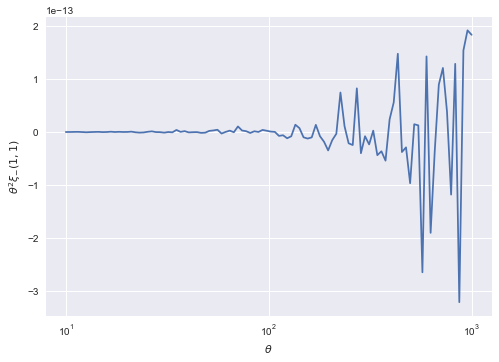

In [44]:
plt.xscale('log')
plt.plot(thetav, thetav**2 * ximL)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\theta^2 \xi_{-}(1,1)$");
# plt.savefig("/Users/c49734lf/Workspace/2019-2020/Presentations/Sarahs_meetings/June_5/Plots/theta2_xim.pdf")

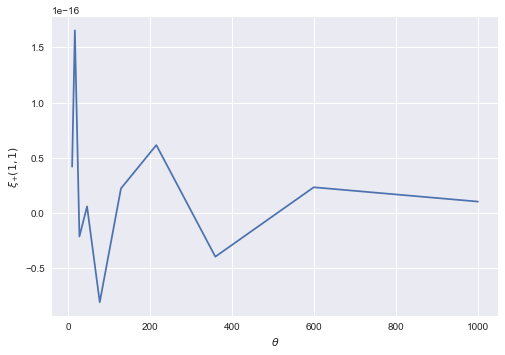

In [40]:
plt.plot(thetav, xipL)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\xi_{+}(1,1)$");
# plt.savefig("/Users/c49734lf/Workspace/2019-2020/Presentations/Sarahs_meetings/June_5/Plots/xip.pdf")

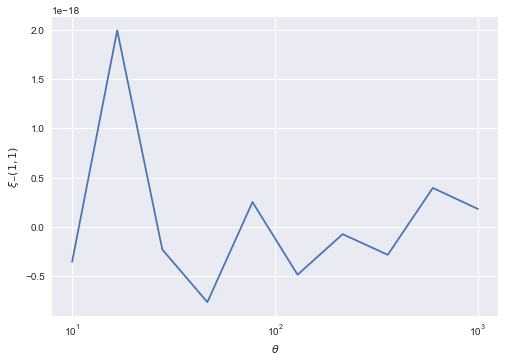

In [94]:
plt.xscale('log')
plt.plot(thetav, ximL)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\xi_{-}(1,1)$");
plt.savefig("/Users/c49734lf/Workspace/2019-2020/Presentations/Sarahs_meetings/June_5/Plots/xim.pdf")
